In [190]:
from trectools import TrecQrel, procedures, TrecEval, TrecRun
import pandas as pd, seaborn as sns

In [191]:
qrels_type = 'dev' # 'dev' or 'dl19' or 'v2_dev2'
map_or_ndcg = 'ndcg' # 'map' or 'ndcg'
ndcg_depth = 100

if map_or_ndcg == 'map':
    metric = 'MAP@'+str(ndcg_depth)
elif map_or_ndcg == 'ndcg':
    metric = 'NDCG@'+str(ndcg_depth)
else :
    print('unsupported metric!')

In [192]:
# We load a qrel object from a file:

if qrels_type == 'dev': # 'dev' or 'dl19' or 'v2_dev2'
    qrels_file = "/mnt/ceph/storage/data-in-progress/data-teaching/theses/wstud-thesis-probst/retrievalExperiments/qrels/qrels.msmarco-doc.dev.txt"
    print('dev qrels loaded')
elif qrels_type == 'dl19':
    qrels_file = "/mnt/ceph/storage/data-in-progress/data-teaching/theses/wstud-thesis-probst/retrievalExperiments/qrels/qrels.dl19-doc.txt"
    print('dl19 qrels loaded')
elif qrels_type == 'v2_dev2':
    qrels_file = "/mnt/ceph/storage/data-in-progress/data-teaching/theses/wstud-thesis-probst/retrievalExperiments/qrels/qrels.msmarco-v2.dev2.tsv"
    print('msmarco_v2.dev2 qrels loaded')
    
qrels = TrecQrel(qrels_file)

# Internally TrecTools save the objects as Pandas dataframes
qrels.qrels_data.head()

dev qrels loaded


,query,q0,docid,rel
0,2,0,D1650436,1
1,1215,0,D1202771,1
2,1288,0,D1547717,1
3,1576,0,D1313702,1
4,2235,0,D2113408,1


In [184]:
# A typical evaluation workflow

runs_dir = "/mnt/ceph/storage/data-in-progress/data-teaching/theses/wstud-thesis-probst/retrievalExperiments/runs/anchor-text-mixed-ccs"
#runs_dir = "/mnt/ceph/storage/data-in-progress/data-teaching/theses/wstud-thesis-probst/retrievalExperiments/runs/ms-marco-v2"

context = 'anchortext'

dates = ['combined' '16-07', '17-04', '18-13', '2016-2017-2018']

metricResults = []

for date in dates:
    print("/run.msmarco-doc.cc-"+date+"-"+context+".bm25-default.dev.txt")
    run = TrecRun(runs_dir + "/run.msmarco-doc.cc-"+date+"-"+context+".bm25-default.dev.txt")
    te = TrecEval(run, qrels)
    metricResults.append((te.get_map(per_query=True, depth=ndcg_depth), date))
    
#run = TrecRun(runs_dir + "/run.msmarco-doc.msmarco-doc-v2.bm25-default.dev.txt")
#te = TrecEval(run, qrels)
#metricResults.append((te.get_ndcg(per_query=True, depth=ndcg_depth), 'msmarco-docs-v2'))
run = TrecRun("mnt/ceph/storage/data-in-progress/data-teaching/theses/wstud-thesis-probst/retrievalExperiments/runs/ms-marco-content/run.msmarco-doc.ms-marco-content.bm25-default.dev.txt")
te = TrecEval(run, qrels)
metricResults.append((te.get_map(per_query=True, depth=ndcg_depth), 'content'))

print("done!")

/run.msmarco-doc.cc-combined-anchortext.bm25-default.dev.txt
done!


In [13]:
# orcas

runs_dir = "/mnt/ceph/storage/data-in-progress/data-teaching/theses/wstud-thesis-probst/retrievalExperiments/runs/"

metricResults = []

run = TrecRun(runs_dir + "anchor-text-mixed-ccs/run.msmarco-doc.cc-combined-anchortext.bm25-default.dev.txt")
te = TrecEval(run, qrels)
metricResults.append((te.get_ndcg(per_query=False, depth=ndcg_depth), 'Anchor Text'))

run = TrecRun(runs_dir + "orcas/run.msmarco-doc.orcas.bm25-default.dev.txt")
te = TrecEval(run, qrels)
metricResults.append((te.get_ndcg(per_query=False, depth=ndcg_depth), 'ORCAS'))

run = TrecRun(runs_dir + "anchor-text-matched-to-orcas/run.msmarco-doc.at-matched-orcas-at.bm25-default.dev.txt")
te = TrecEval(run, qrels)
metricResults.append((te.get_ndcg(per_query=False, depth=ndcg_depth), 'Anchor Text matched'))

run = TrecRun(runs_dir + "orcas-matched/run.msmarco-doc.orcas-matched-orcas-at.bm25-default.dev.txt")
te = TrecEval(run, qrels)
metricResults.append((te.get_ndcg(per_query=False, depth=ndcg_depth), 'ORCAS matched'))


print("done!")

done!


In [185]:
#for per_query=True
typedResults = []

for metricRes in metricResults:
    metricRes[0]['Type'] = metricRes[1]#+' Anchor Text'
    typedResults.append(metricRes[0])

result_map = pd.concat(typedResults, axis=0)

result_map

,MAP@1000,Type
query,,
2,1.000000,combined
1215,0.002242,combined
1288,0.000000,combined
1576,0.000000,combined
2235,0.000000,combined
...,...,...
1102330,0.125000,content
1102335,0.062500,content
1102351,1.000000,content


In [186]:
plot_orders = []

for typedRes in typedResults:
    plot_order = typedRes.sort_values(by=metric, ascending=False)
    plot_order.insert(0, 'Query', range(0, len(plot_order)))
    plot_orders.append(plot_order)
    
result_map = pd.concat(plot_orders)
#result_map = result_map.fillna(0)
#result_map['Type'] = result_map['Type'].apply(lambda x: '2016+2017+2018 Anchor Text' if x == '2016-2017-2018 Anchor Text' else x)
#result_map['Type'] = result_map['Type'].apply(lambda x: 'all Anchor Text' if x == 'combined Anchor Text' else x)

result_map

,Query,MAP@1000,Type
query,,,
2,0,1.0,combined
801059,1,1.0,combined
820161,2,1.0,combined
820899,3,1.0,combined
114037,4,1.0,combined
...,...,...,...
1090808,5188,0.0,content
653041,5189,0.0,content
259417,5190,0.0,content


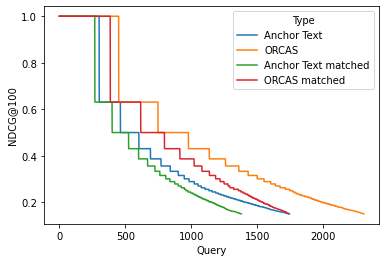

In [12]:
plot = sns.lineplot(x="Query", y=metric, hue="Type", data=result_map.reset_index(), sort=False) #, order=plot_order)
fig4 = plot.get_figure()
fig4.savefig("ndcg"+str(ndcg_depth)+"_orcas.pdf")

In [16]:
#for per_query=False
result_map = pd.DataFrame(metricResults, columns=[metric, 'Type'])
#result_map = result_map.sort_values(by=metric)
#result_map.at[3, 'Crawl'] = '2016+2017+2018'
#result_map.at[4, 'Crawl'] = 'all'
#result_map=result_map[metric].astype(float)
result_map

,NDCG@100,Type
0,0.149148,Anchor Text
1,0.217566,ORCAS
2,0.124270,Anchor Text matched
3,0.171976,ORCAS matched


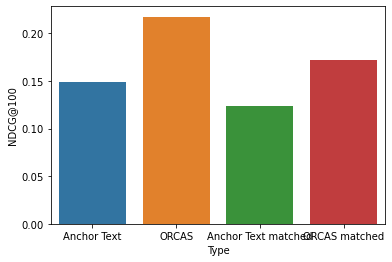

In [17]:
plot = sns.barplot(x="Type", y=metric, data=result_map) #, order=plot_order)
fig4 = plot.get_figure()
fig4.savefig("ndcg"+str(ndcg_depth)+"_orcas_barplot.pdf")

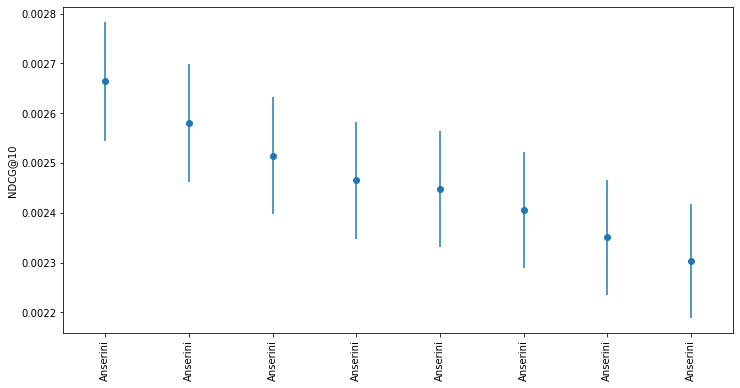

In [119]:
ndcg10 = procedures.extract_metric_from_results(results, "P_100")
fig5 = procedures.plot_system_rank(ndcg10, display_metric="NDCG@10")

In [162]:
result_map

,Query,MAP@100,Type
query,,,
2,0,1.0,combined
801059,1,1.0,combined
820161,2,1.0,combined
820899,3,1.0,combined
114037,4,1.0,combined
...,...,...,...
588888,5188,0.0,content
1046931,5189,0.0,content
1046569,5190,0.0,content


In [189]:
result_map_wide = result_map.pivot(columns="Type", values="MAP@1000")

result_map_wide.loc[96250]

Type
combined    1.000000
content     0.001236
Name: 96250, dtype: float64

In [ ]:
#combine 